# Data Cleaning Analysis and Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load original and cleaned data
print("Loading data for comparison...")
df_original = pd.read_csv('/kaggle/input/city-day/city_day.csv')
df_cleaned = pd.read_csv('/kaggle/input/city-day-cleaned/city_day_cleaned (1).csv')

print(f"Original shape: {df_original.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Loading data for comparison...
Original shape: (27284, 15)
Cleaned shape: (27284, 15)


# VISUALIZATION 1: Missing Values Comparison


✓ Saved: missing_values_comparison.png


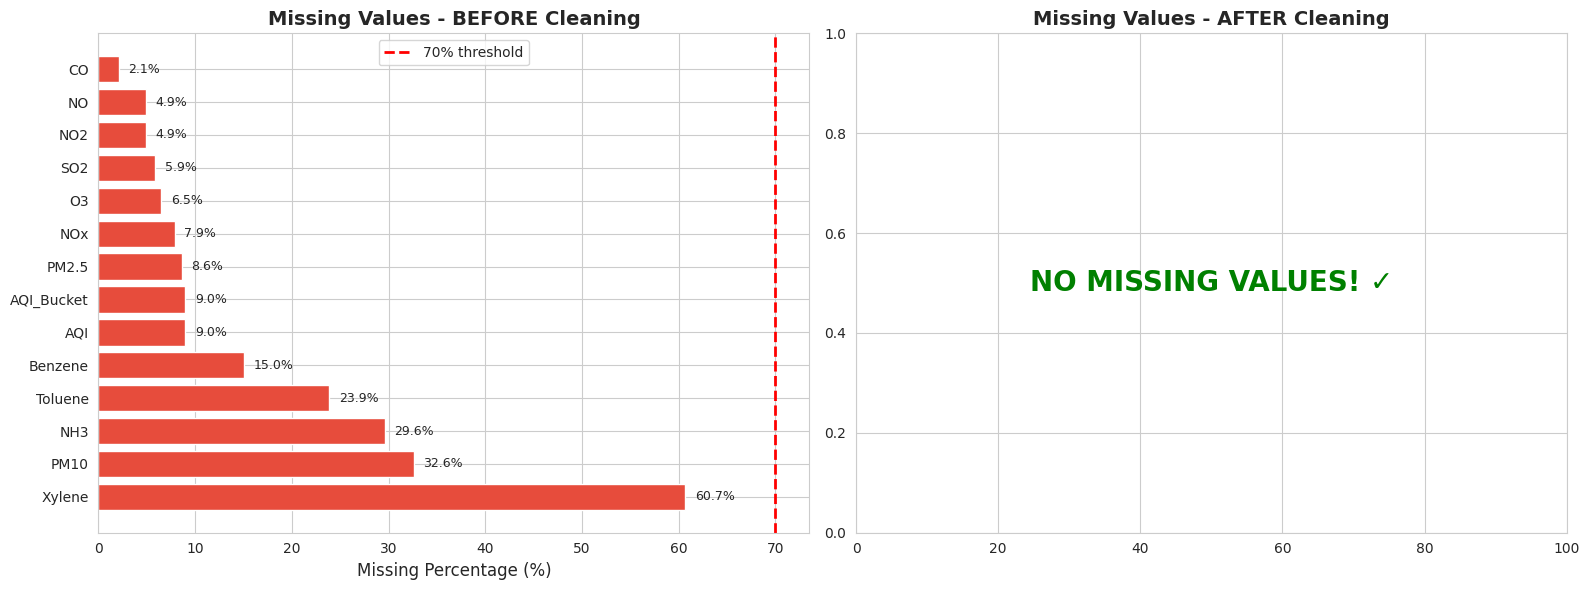

In [3]:
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 2, figure=fig)

# Before cleaning
ax1 = fig.add_subplot(gs[0, 0])
missing_before = (df_original.isnull().sum() / len(df_original) * 100).sort_values(ascending=False)
missing_before = missing_before[missing_before > 0]
bars1 = ax1.barh(range(len(missing_before)), missing_before.values, color='#e74c3c')
ax1.set_yticks(range(len(missing_before)))
ax1.set_yticklabels(missing_before.index)
ax1.set_xlabel('Missing Percentage (%)', fontsize=12)
ax1.set_title('Missing Values - BEFORE Cleaning', fontsize=14, fontweight='bold')
ax1.axvline(x=70, color='red', linestyle='--', linewidth=2, label='70% threshold')
ax1.legend()
for i, v in enumerate(missing_before.values):
    ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# After cleaning
ax2 = fig.add_subplot(gs[0, 1])
missing_after = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)
if missing_after.sum() == 0:
    ax2.text(0.5, 0.5, 'NO MISSING VALUES! ✓', 
             ha='center', va='center', fontsize=20, fontweight='bold', color='green',
             transform=ax2.transAxes)
    ax2.set_xlim(0, 100)
else:
    missing_after = missing_after[missing_after > 0]
    bars2 = ax2.barh(range(len(missing_after)), missing_after.values, color='#27ae60')
    ax2.set_yticks(range(len(missing_after)))
    ax2.set_yticklabels(missing_after.index)
    ax2.set_xlabel('Missing Percentage (%)', fontsize=12)
    for i, v in enumerate(missing_after.values):
        ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

ax2.set_title('Missing Values - AFTER Cleaning', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/missing_values_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: missing_values_comparison.png")


# VISUALIZATION 2: Distribution Comparison (Key Pollutants)

✓ Saved: distribution_comparison.png


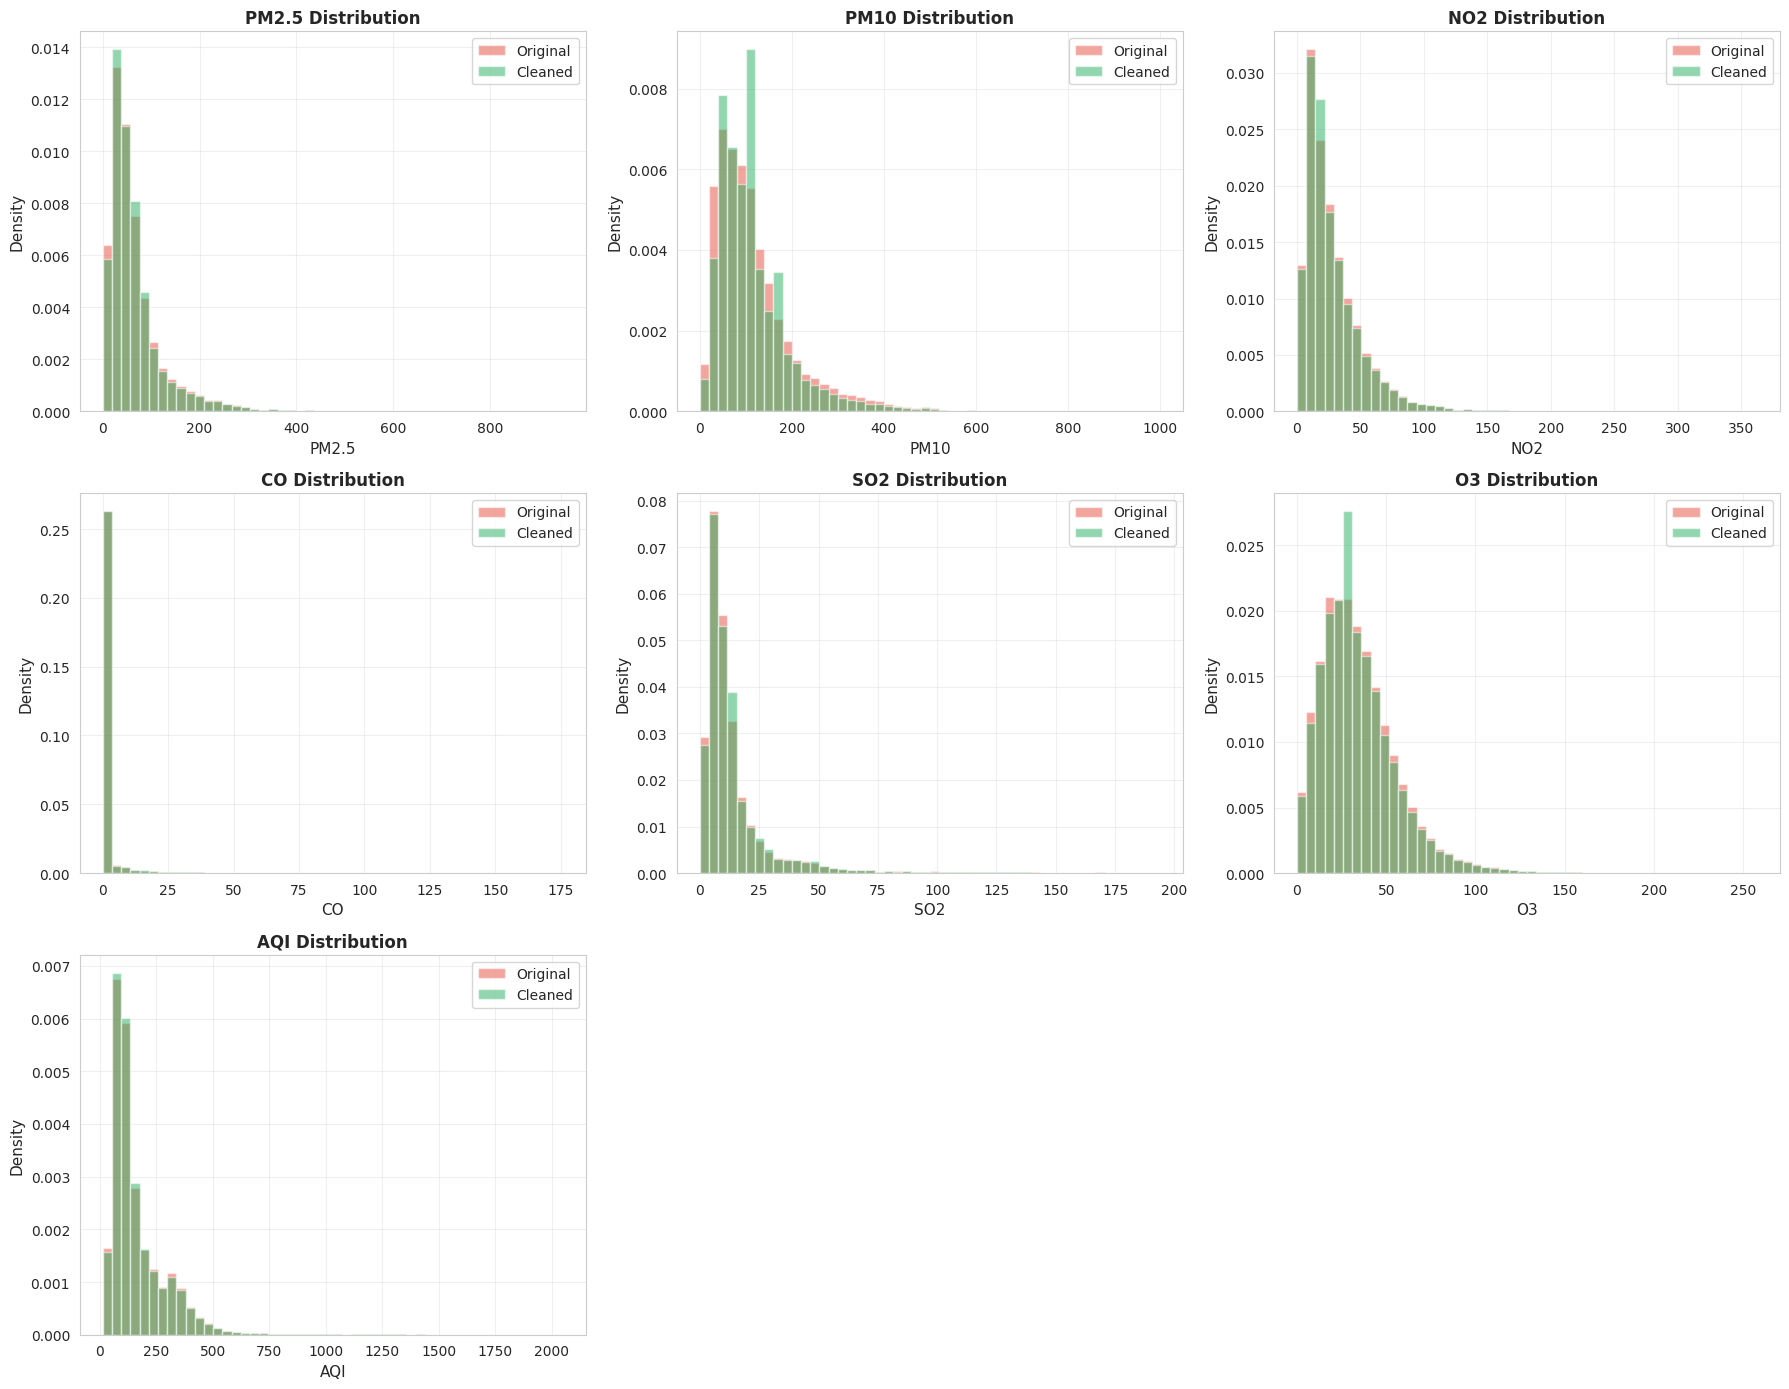

In [4]:
key_pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']
available_pollutants = [col for col in key_pollutants if col in df_cleaned.columns]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(available_pollutants):
    ax = axes[idx]
    
    # Original distribution (non-null values only)
    original_data = df_original[col].dropna()
    cleaned_data = df_cleaned[col]
    
    ax.hist(original_data, bins=50, alpha=0.5, label='Original', color='#e74c3c', density=True)
    ax.hist(cleaned_data, bins=50, alpha=0.5, label='Cleaned', color='#27ae60', density=True)
    
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

# Remove extra subplots
for idx in range(len(available_pollutants), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('/kaggle/working/distribution_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: distribution_comparison.png")

# VISUALIZATION 3: AQI Bucket Distribution

✓ Saved: aqi_bucket_comparison.png


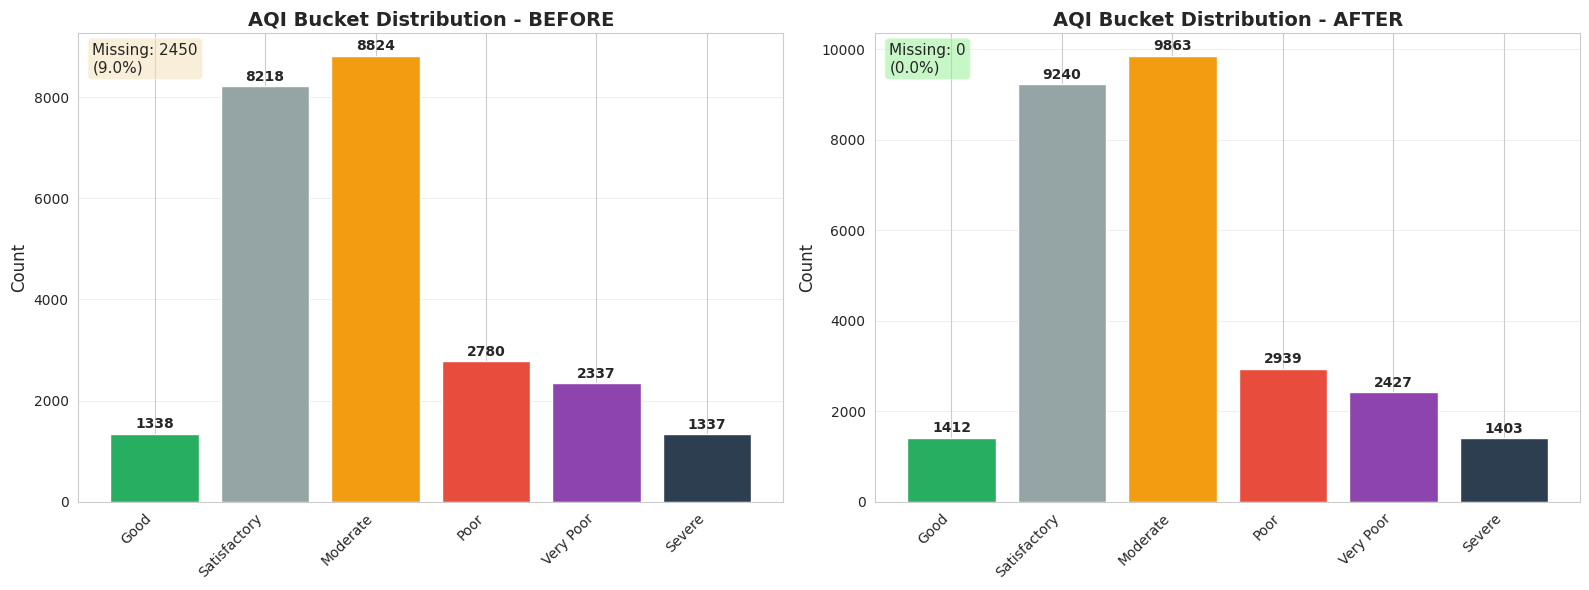

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before
bucket_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
before_counts = df_original['AQI_Bucket'].value_counts()
before_counts = before_counts.reindex([b for b in bucket_order if b in before_counts.index], fill_value=0)

colors = ['#27ae60', '#95a5a6', '#f39c12', '#e74c3c', '#8e44ad', '#2c3e50']
ax1.bar(range(len(before_counts)), before_counts.values, color=colors[:len(before_counts)])
ax1.set_xticks(range(len(before_counts)))
ax1.set_xticklabels(before_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('AQI Bucket Distribution - BEFORE', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(before_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add missing count
missing_count = df_original['AQI_Bucket'].isnull().sum()
ax1.text(0.02, 0.98, f'Missing: {missing_count}\n({missing_count/len(df_original)*100:.1f}%)', 
         transform=ax1.transAxes, va='top', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# After
after_counts = df_cleaned['AQI_Bucket'].value_counts()
after_counts = after_counts.reindex([b for b in bucket_order if b in after_counts.index], fill_value=0)

ax2.bar(range(len(after_counts)), after_counts.values, color=colors[:len(after_counts)])
ax2.set_xticks(range(len(after_counts)))
ax2.set_xticklabels(after_counts.index, rotation=45, ha='right')
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('AQI Bucket Distribution - AFTER', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(after_counts.values):
    ax2.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add missing count
missing_count_after = df_cleaned['AQI_Bucket'].isnull().sum()
ax2.text(0.02, 0.98, f'Missing: {missing_count_after}\n({missing_count_after/len(df_cleaned)*100:.1f}%)', 
         transform=ax2.transAxes, va='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('/kaggle/working/aqi_bucket_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: aqi_bucket_comparison.png")

# VISUALIZATION 4: City-wise Data Completeness

/tmp/ipykernel_56/300371098.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_completeness_before = df_original.groupby('City').apply(
/tmp/ipykernel_56/300371098.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_completeness_after = df_cleaned.groupby('City').apply(


✓ Saved: city_completeness_comparison.png


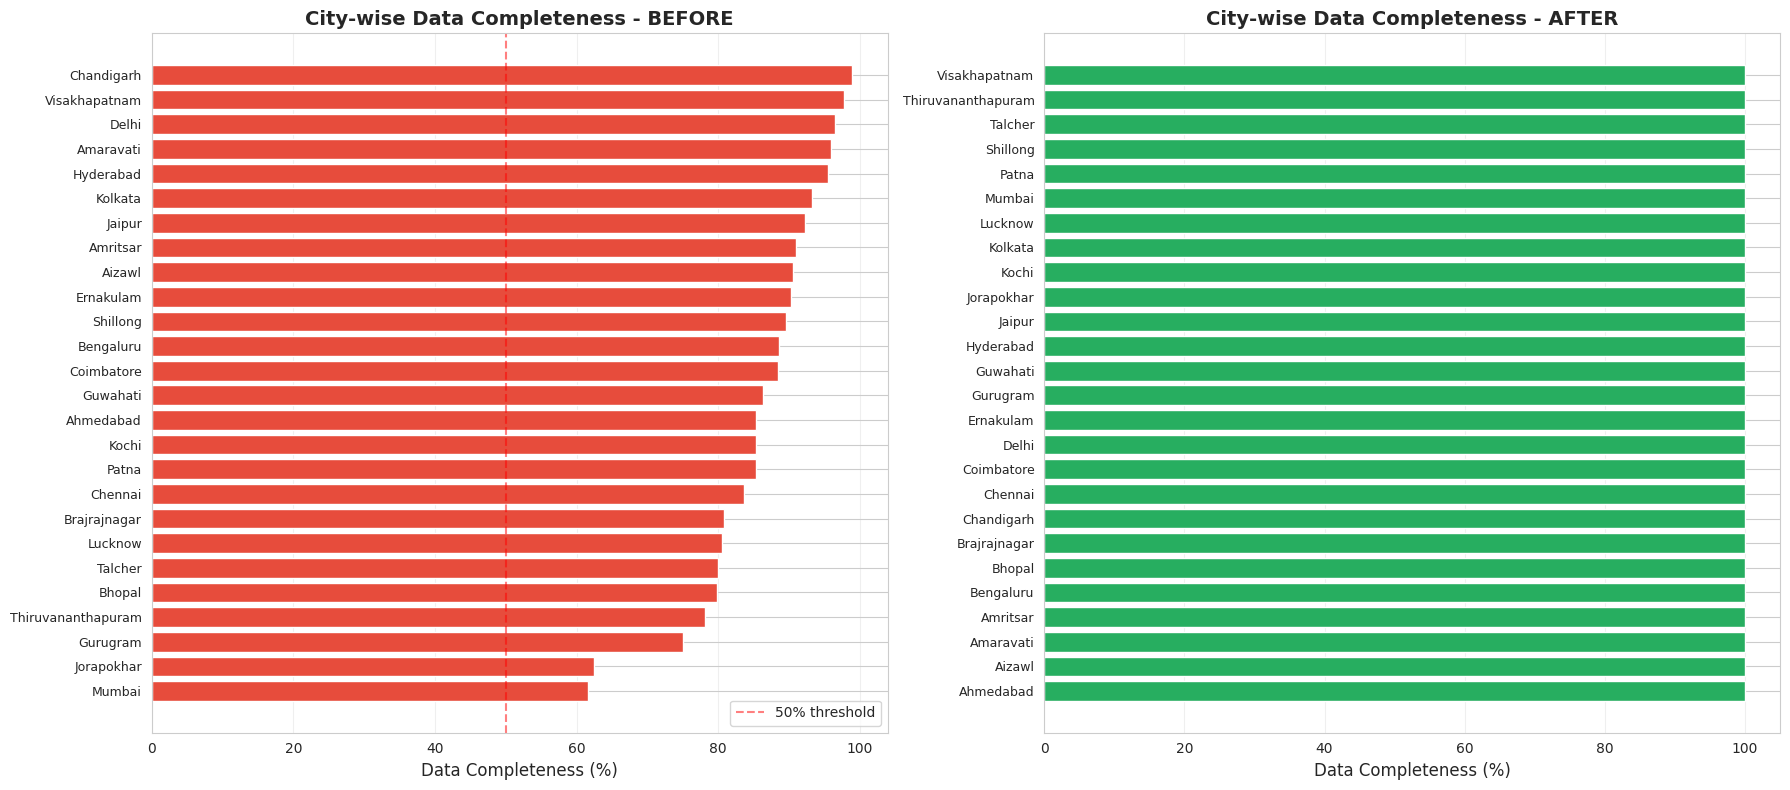

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Before
city_completeness_before = df_original.groupby('City').apply(
    lambda x: (1 - x.isnull().sum().sum() / (len(x) * len(x.columns))) * 100
).sort_values()

ax1.barh(range(len(city_completeness_before)), city_completeness_before.values, color='#e74c3c')
ax1.set_yticks(range(len(city_completeness_before)))
ax1.set_yticklabels(city_completeness_before.index, fontsize=9)
ax1.set_xlabel('Data Completeness (%)', fontsize=12)
ax1.set_title('City-wise Data Completeness - BEFORE', fontsize=14, fontweight='bold')
ax1.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# After
city_completeness_after = df_cleaned.groupby('City').apply(
    lambda x: (1 - x.isnull().sum().sum() / (len(x) * len(x.columns))) * 100
).sort_values()

ax2.barh(range(len(city_completeness_after)), city_completeness_after.values, color='#27ae60')
ax2.set_yticks(range(len(city_completeness_after)))
ax2.set_yticklabels(city_completeness_after.index, fontsize=9)
ax2.set_xlabel('Data Completeness (%)', fontsize=12)
ax2.set_title('City-wise Data Completeness - AFTER', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/city_completeness_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: city_completeness_comparison.png")

# STATISTICS REPORT

In [7]:
print("\n" + "=" * 80)
print("DATA CLEANING STATISTICS REPORT")
print("=" * 80)

print("\n1. MISSING VALUES FILLED:")
print("-" * 40)
for col in df_original.columns:
    if col in df_cleaned.columns:
        before = df_original[col].isnull().sum()
        after = df_cleaned[col].isnull().sum()
        filled = before - after
        if filled > 0:
            print(f"  {col:15s}: {filled:6d} values ({filled/before*100:5.1f}% of missing)")

print("\n2. DATA QUALITY METRICS:")
print("-" * 40)
before_complete = (1 - df_original.isnull().sum().sum() / (len(df_original) * len(df_original.columns))) * 100
after_complete = (1 - df_cleaned.isnull().sum().sum() / (len(df_cleaned) * len(df_cleaned.columns))) * 100
print(f"  Overall Completeness BEFORE: {before_complete:.2f}%")
print(f"  Overall Completeness AFTER:  {after_complete:.2f}%")
print(f"  Improvement:                  {after_complete - before_complete:.2f}%")

print("\n3. AQI BUCKET CHANGES:")
print("-" * 40)
before_missing = df_original['AQI_Bucket'].isnull().sum()
after_missing = df_cleaned['AQI_Bucket'].isnull().sum()
print(f"  Missing AQI_Bucket BEFORE:    {before_missing} ({before_missing/len(df_original)*100:.2f}%)")
print(f"  Missing AQI_Bucket AFTER:     {after_missing} ({after_missing/len(df_cleaned)*100:.2f}%)")
print(f"  Successfully recalculated:    {before_missing - after_missing}")

print("\n4. SUMMARY:")
print("-" * 40)
print(f"  ✓ Total missing values filled: {df_original.isnull().sum().sum() - df_cleaned.isnull().sum().sum()}")
print(f"  ✓ Data completeness improved by: {after_complete - before_complete:.2f}%")
print(f"  ✓ All columns retained (no columns dropped)")
print(f"  ✓ Final dataset: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"  ✓ Zero missing values in final dataset!")

print("\n" + "=" * 80)
print("All visualizations saved successfully!")
print("=" * 80)


DATA CLEANING STATISTICS REPORT

1. MISSING VALUES FILLED:
----------------------------------------
  PM2.5          :   2351 values (100.0% of missing)
  PM10           :   8894 values (100.0% of missing)
  NO             :   1336 values (100.0% of missing)
  NO2            :   1339 values (100.0% of missing)
  NOx            :   2150 values (100.0% of missing)
  NH3            :   8082 values (100.0% of missing)
  CO             :    576 values (100.0% of missing)
  SO2            :   1608 values (100.0% of missing)
  O3             :   1776 values (100.0% of missing)
  Benzene        :   4098 values (100.0% of missing)
  Toluene        :   6514 values (100.0% of missing)
  Xylene         :  16549 values (100.0% of missing)
  AQI            :   2450 values (100.0% of missing)
  AQI_Bucket     :   2450 values (100.0% of missing)

2. DATA QUALITY METRICS:
----------------------------------------
  Overall Completeness BEFORE: 85.30%
  Overall Completeness AFTER:  100.00%
  Improvement